## Creating main dataset to standardize for the Final Jupyter Notebook

Needs to have ROI, Budgets, and Runntime

In [2]:
### Import the nessesary libraries
import pandas as pd
import sqlite3 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

In [3]:
df_num = pd.read_csv('data/tn.movie_budgets.csv.gz')

In [4]:
conn = sqlite3.connect('data/sqldata/im.db')
q = """
SELECT 
    primary_title AS p_title,
    runtime_minutes AS time_min,
    averagerating AS avg_rating,
    genres
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
;
"""
df_IMDB = pd.read_sql(q, conn)

Combine the two into a single dataframe

In [5]:
### Merge on Primary Title
df = pd.merge(df_IMDB, 
            df_num, 
            how='inner', 
            left_on = 'p_title', 
            right_on = 'movie')
#df.info()

Cleaning the dataset

In [6]:
#Domestic
df['domestic_millions'] = df.domestic_gross.str.replace(',','')
df['domestic_millions'] = df.domestic_millions.str.replace('$','')
df['domestic_millions'] = pd.to_numeric(df.domestic_millions) / 1000000

#Worldwide
df['worldwide_millions'] = df.worldwide_gross.str.replace(',','')
df['worldwide_millions'] = df.worldwide_millions.str.replace('$','')
df['worldwide_millions'] = pd.to_numeric(df.worldwide_millions) / 1000000

# Get rid of non-numerics in production_budget
df['budget_millions'] = df.production_budget.str.replace(',','')
df['budget_millions'] = df.budget_millions.str.replace('$','')
df['budget_millions'] = pd.to_numeric(df.budget_millions) / 1000000

#df.info()

In [7]:
#Drop duplicates
df.drop_duplicates(subset=['movie'],inplace=True)
# df.head(10)

In [8]:
#df.info()

Adding in the correct roi

In [9]:
df['roi'] = (df.worldwide_millions - df.budget_millions)/df.budget_millions
#df.head()

Add in the binning for the production budget

In [10]:
def binning(x):
    if x > 216:
        return 216
    elif x > 108:
        return 108
    elif x > 64:
        return 64
    elif x > 32:
        return 32
    elif x > 16:
        return 16
    elif x > 8:
        return 8
    elif x > 4:
        return 4
    elif x > 2:
        return 2
    else:
        return 1

In [11]:
x = [binning(x) for x in df['budget_millions']]

In [12]:
pd.options.mode.chained_assignment = None
df['budget_binning'] = x

In [13]:
df.head(10)

,p_title,time_min,avg_rating,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_millions,worldwide_millions,budget_millions,roi,budget_binning
0,Foodfight!,91.0,1.9,"Action,Animation,Comedy",26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706",0.000000,0.073706,45.0,-0.998362,32
1,The Overnight,88.0,7.5,None,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996",1.109808,1.165996,0.2,4.829980,1
3,On the Road,124.0,6.1,"Adventure,Drama,Romance",17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302",0.720828,9.313302,25.0,-0.627468,16
6,The Secret Life of Walter Mitty,114.0,7.3,"Adventure,Comedy,Drama",37,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183",58.236838,187.861183,91.0,1.064409,64
7,A Walk Among the Tombstones,114.0,6.5,"Action,Crime,Drama",67,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587",26.017685,62.108587,28.0,1.218164,16
8,Jurassic World,124.0,7.0,"Action,Adventure,Sci-Fi",34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",652.270625,1648.854864,215.0,6.669092,108
9,The Rum Diary,119.0,6.2,"Comedy,Drama",16,"Oct 28, 2011",The Rum Diary,"$45,000,000","$13,109,815","$21,544,732",13.109815,21.544732,45.0,-0.521228,32
10,The Three Stooges,92.0,5.1,"Comedy,Family",4,"Apr 13, 2012",The Three Stooges,"$30,000,000","$44,338,224","$54,052,249",44.338224,54.052249,30.0,0.801742,16
11,Anderson's Cross,98.0,5.5,"Comedy,Drama,Romance",65,"Dec 31, 2010",Anderson's Cross,"$300,000",$0,$0,0.000000,0.000000,0.3,-1.000000,1
12,Tangled,100.0,7.8,"Adventure,Animation,Comedy",15,"Nov 24, 2010",Tangled,"$260,000,000","$200,821,936","$586,477,240",200.821936,586.477240,260.0,1.255682,216


# Genre Z-Test Analysis

# Law of Diminishing Returns Analysis

The objective with this analysis is to visualize the law of dimishing returns comparing production budget (our group will assume that production budget is cost) to the overall rating and ROI of the film. 

Starting with Production budget vs. Overall Rating

<AxesSubplot:xlabel='avg_rating', ylabel='budget_millions'>

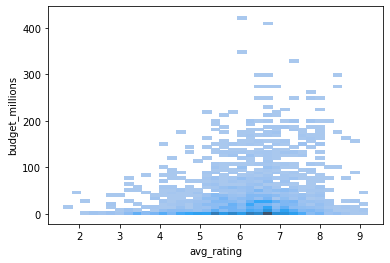

In [14]:
#First a simple viuslization
sns.histplot(x=df.avg_rating,
             y=df.budget_millions)

From this visual we can see that the average ratings are concentrated around the mean, as well as there are many outliers in budget upward of 200 Million. Using the binning already added into the dataframe, we can bin the production budgets for a visualization showing the increase in budget vs the average rating. This will demonstrate the rate and variance of ratings as production budget (Movie Costs) increase.

C:\Users\samumartin\Anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Budget Millions'),
 Text(0, 0.5, 'Average Rating'),
 Text(0.5, 1.0, 'Diminishing Ratings as Budget Increases')]

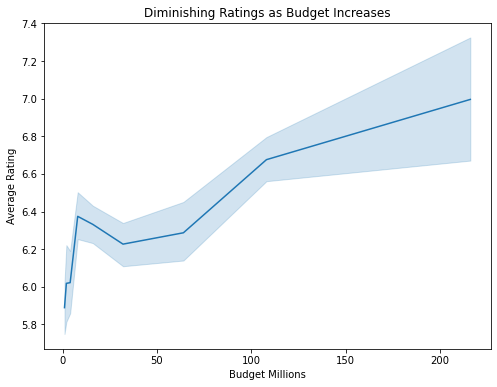

In [18]:
# Use matplotlib to set the figure size and shape
fig, ax = plt.subplots(figsize=(8,6))

#Create a lineplot of both using seaborn
ax = sns.lineplot(df.budget_binning, df.avg_rating)
ax.set(xlabel='Budget Millions', ylabel='Average Rating', title='Diminishing Ratings as Budget Increases')
# ax.axhline(df.avg_rating.mean(), color='red')

Based on the plot above, we can see that after budgets start to excede 100 million, returns start to diminish as well as become more volitile. It shows that ratings will tend to show less improvement in ratings as the production budget increases. Now let's try the same thing but for ROI.

C:\Users\samumartin\Anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


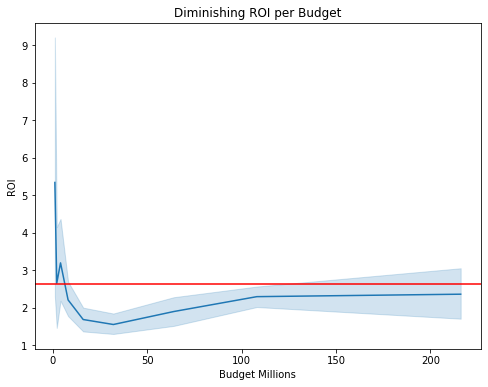

In [19]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(df.budget_binning, df.roi)
ax.set(xlabel='Budget Millions', ylabel='ROI', title='Diminishing ROI per Budget')
ax.axhline(df.roi.mean(), color='red')

Based on the graph above, there seem to be a large amount of outliers on the upper end of ROI skewing our data. To get rid of that we're going to make a normal distribution using the ROI data points, and keep the lower 99% of those values as to not deal with large and unlikely ROI's.

In [21]:
dist = stats.norm(df.roi.mean(),df.roi.std())
dist.ppf(.99)
#This now identifies the new cutoff for ROI values. We can use this to drop rows with ROI's greater than that

34.32943718308409

In [22]:
#Drop ROI's where the roi is > 3
df_dropped34 = df.drop(df[df['roi'] > 34].index, inplace=False)
df_dropped34.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2109 entries, 0 to 2874
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   p_title             2109 non-null   object 
 1   time_min            2055 non-null   float64
 2   avg_rating          2109 non-null   float64
 3   genres              2107 non-null   object 
 4   id                  2109 non-null   int64  
 5   release_date        2109 non-null   object 
 6   movie               2109 non-null   object 
 7   production_budget   2109 non-null   object 
 8   domestic_gross      2109 non-null   object 
 9   worldwide_gross     2109 non-null   object 
 10  domestic_millions   2109 non-null   float64
 11  worldwide_millions  2109 non-null   float64
 12  budget_millions     2109 non-null   float64
 13  roi                 2109 non-null   float64
 14  budget_binning      2109 non-null   int64  
dtypes: float64(6), int64(2), object(7)
memory usage: 263.6+

Let's run the graph again, this time without the large outliers on ROI.

C:\Users\samumartin\Anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


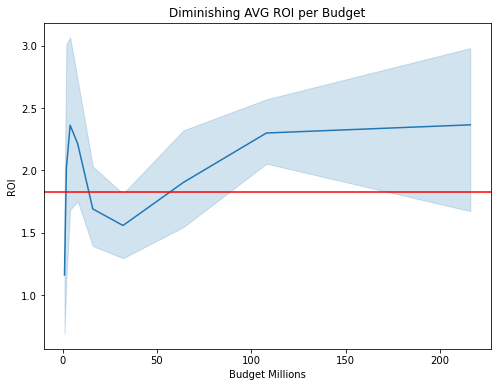

In [24]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(df_dropped34.budget_binning, df_dropped34.roi)
ax.set(xlabel='Budget Millions', ylabel='ROI', title='Diminishing AVG ROI per Budget')
ax.axhline(df_dropped34.roi.mean(), color='red')

From the graph above, we can now see that returns on investment virtually flatline after 100 million in production budget, with an increase in volatility. From both average ROI and average rating, we can say that returns diminish substantially after an investment of 100 million.

# Runtime Analysis